# Churn Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

## 1.โหลด csv เข้าไปใน Python Pandas

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [159]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [160]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [161]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9088,9089,15608246,Wentcher,736,Germany,Female,36,8,103914.17,1,1,1,110035.88,1
9879,9880,15669414,Pisano,486,Germany,Male,62,9,118356.89,2,1,0,168034.83,1
4458,4459,15585839,Niu,633,France,Male,37,2,0.00,2,1,0,182258.17,0
219,220,15774854,Fuller,592,France,Male,54,8,0.00,1,1,1,28737.71,1
7568,7569,15809909,Fan,422,Spain,Female,54,4,0.00,2,1,1,7166.71,0
1618,1619,15662955,Nicholls,697,France,Male,27,8,141223.68,2,1,0,90591.15,0
3007,3008,15697997,Jamieson,602,France,Male,33,5,164704.38,1,0,1,180716.10,1
2402,2403,15646539,Liao,531,France,Male,31,3,96288.26,1,1,0,56794.73,0
6067,6068,15675431,Chidimma,563,France,Female,34,6,0.00,2,0,0,36536.93,0
7178,7179,15678210,Robson,684,France,Male,38,5,105069.98,2,1,1,198355.28,0


Note :  
คอลัมน์ RowNumber กับ index สามารถใช้แทนกันได้ 

## 3. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Note :  
ไม่มี missing values

In [163]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Note :  
* HasCrCard, IsActiveMember และ Exited เป็น categorical data (0,1)
* NumOfProducts เป็น discrete value

## 4. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น

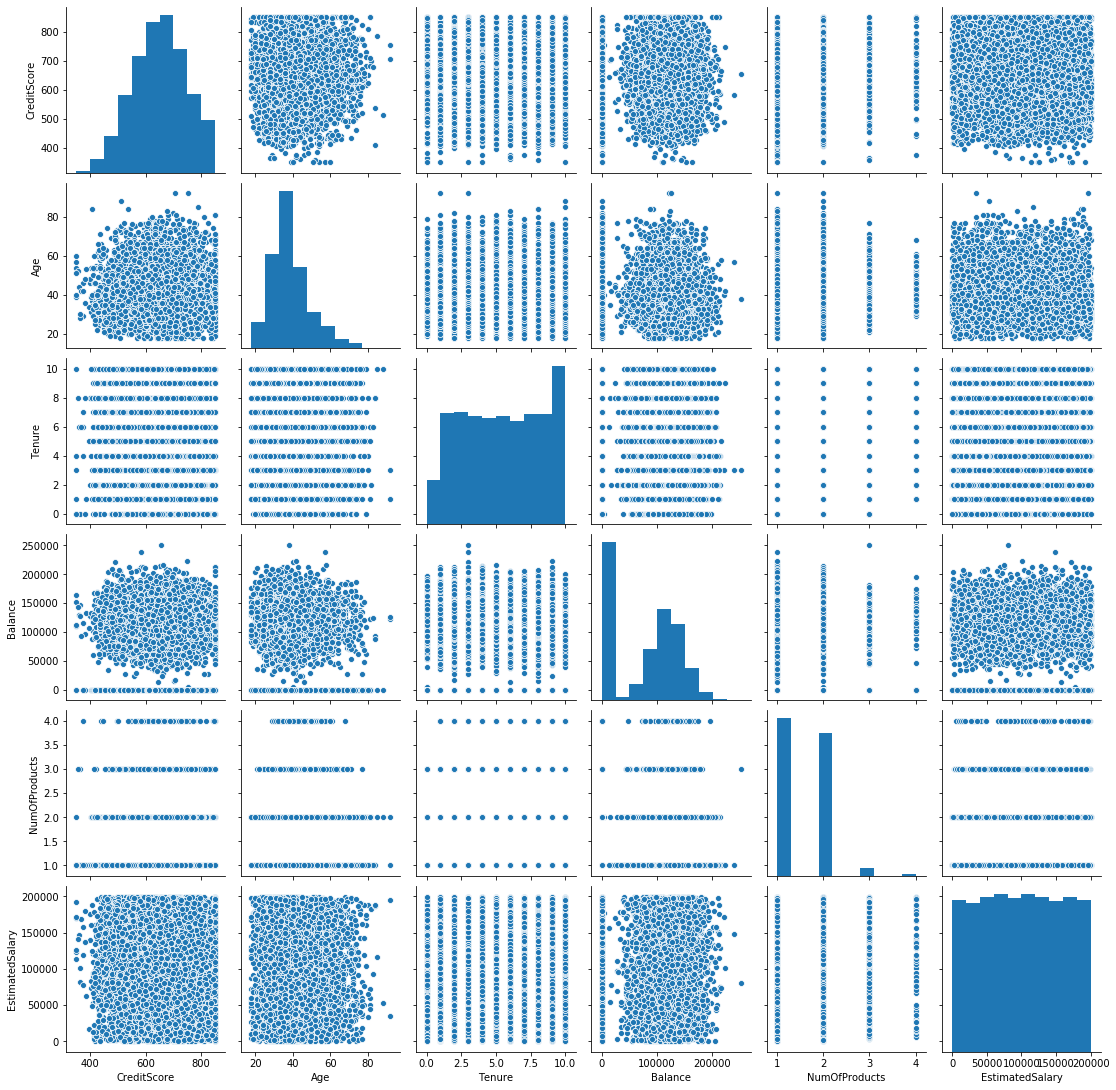

In [164]:
sns.pairplot(df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

## 5. หาจำนวนของค่า unique ของแต่ละ column

In [3]:
for col in df.columns :
    print(col,' : ',np.sort(df[col].unique()))
    print('\n')

RowNumber  :  [    1     2     3 ...  9998  9999 10000]


CustomerId  :  [15565701 15565706 15565714 ... 15815656 15815660 15815690]


Surname  :  ['Abazu' 'Abbie' 'Abbott' ... 'Zuev' 'Zuyev' 'Zuyeva']


CreditScore  :  [350 351 358 359 363 365 367 373 376 382 383 386 395 399 401 404 405 407
 408 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426
 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462
 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498
 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516
 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534
 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552
 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570
 571 572 573 574 575 576 577 578 579 580 581 582 5

## 6. ลบ Rownumber, customerID คอลัมน์

In [4]:
df.drop(['RowNumber','CustomerId'], axis=1, inplace=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 7. สร้าง Distribution plot ของแต่ละคอลัมน์

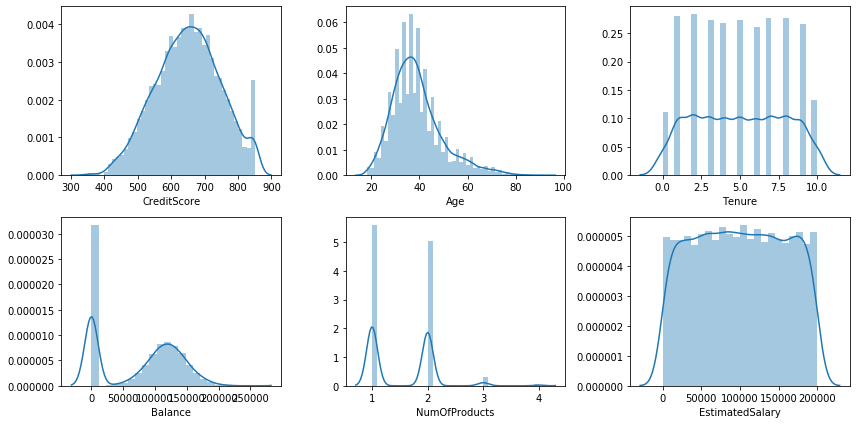

In [167]:
fig = plt.figure(figsize=(12,6))
i = 1
for col in ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'] :
    plt.subplot(2,3,i)
    sns.distplot(df[col])
    i+=1
fig.tight_layout()

Note :  
* CreditScore มี distribution คล้าย Normal distribution แต่ที่ค่าประมาณ 850 มีความถี่สูงมาก
* Age มี skewness เนื่องจากผู้ใช้บริการส่วนใหญ่เป็นคนวัยรุ่นถึงวัยทำงาน 
* Tenure, EstimatedSalary มีลักษณะคล้าน uniform distribution
* Balance ที่มีค่าเท่ากับ 0 มีเป็นจำนวณมาก หากไม่นับรวมค่า 0 ที่เหลือมีลักษณะคล้าย normal distribution
* NumOfProducts ส่วนมากมีค่าเท่ากับ 1 และ 2

## 8. เฉพาะคอลัมน์ Balance ให้ทำ distplot ที่ไม่รวม Balance=0 ด้วย

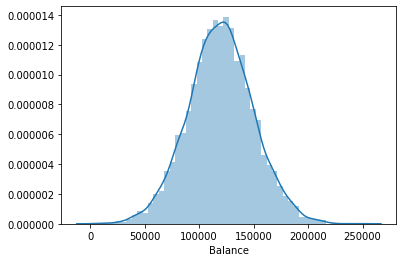

In [168]:
sns.distplot(df[df['Balance'] != 0]['Balance'])

## 9. สร้าง countplot ของ Geography

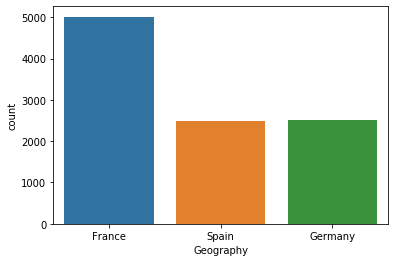

In [169]:
sns.countplot(df['Geography'])

Note :  
ลูกค้าส่วนมากอยู่ในประเทศฝรั่งเศส

## 10. สร้าง countplot ของ Gender

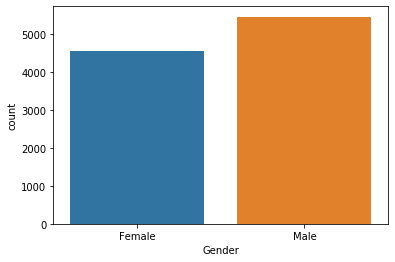

In [170]:
sns.countplot(df['Gender'])

Note :  
ลูกค้ามากกว่า 50% เป็นผู้ชาย

## 11. เช็คว่ามีนามสกุลที่แตกต่างกันทั้งหมดกี่นามสกุลและมีอะไรบ้าง

In [5]:
surnames = np.sort(df['Surname'].unique())
print('มีนามสกุลที่แตกต่างกัน จำนวน ', len(surnames))
print(surnames)

มีนามสกุลที่แตกต่างกัน จำนวน  2932
['Abazu' 'Abbie' 'Abbott' ... 'Zuev' 'Zuyev' 'Zuyeva']


## 12. เช็คว่ามีนามสกุลที่แตกต่างกันทั้งหมดกี่นามสกุลและมีอะไรบ้าง (เฉพาะนามสกุลที่ซ้ำ, ความถี่มากกว่า 1)

In [6]:
surname_count = df['Surname'].value_counts()
print('จำนวนนามสกุลที่ซ้ำ = ', len(surname_count[surname_count > 1]))
surname_count[surname_count > 1].index.values

จำนวนนามสกุลที่ซ้ำ =  1374


array(['Smith', 'Scott', 'Martin', ..., 'Nekrasov', 'Ejikemeifeuwa',
       'Hewitt'], dtype=object)

## 13. สร้าง barplot ให้กับ 15 นามสกุลแรกที่มีการซ้ำมากที่สุดเรียงจากซ้ายไปกว่า และขวามาซ้าย

In [7]:
surname15 = surname_count[surname_count > 1][:15]
surname15

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Shih        25
Genovese    25
Yeh         25
Maclean     24
Wright      24
Ma          23
White       23
Wilson      23
Fanucci     23
Wang        22
Name: Surname, dtype: int64

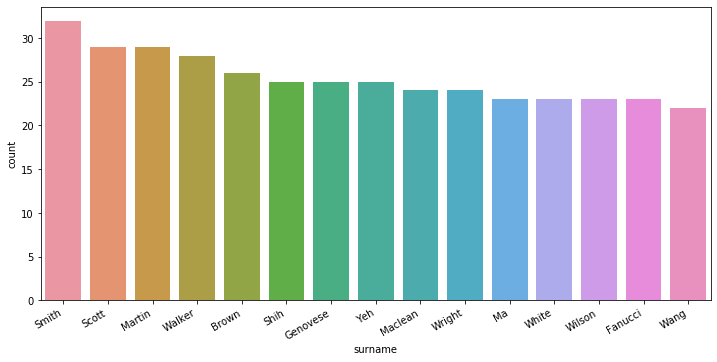

In [8]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x=surname15.index,
           y=surname15)
plt.ylabel('count')
plt.xlabel('surname')
fig.autofmt_xdate()

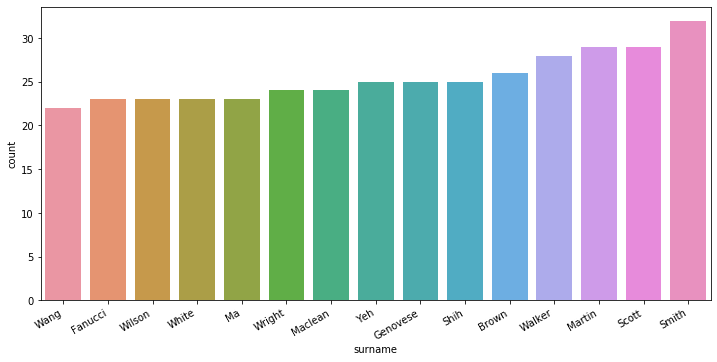

In [9]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x=surname15[::-1].index,
           y=surname15[::-1])
plt.ylabel('count')
plt.xlabel('surname')
fig.autofmt_xdate()

## 14. หา Correlation ของ DataFrame

In [176]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


## 15. สร้าง heatmap จาก Correlation ของ DataFrame

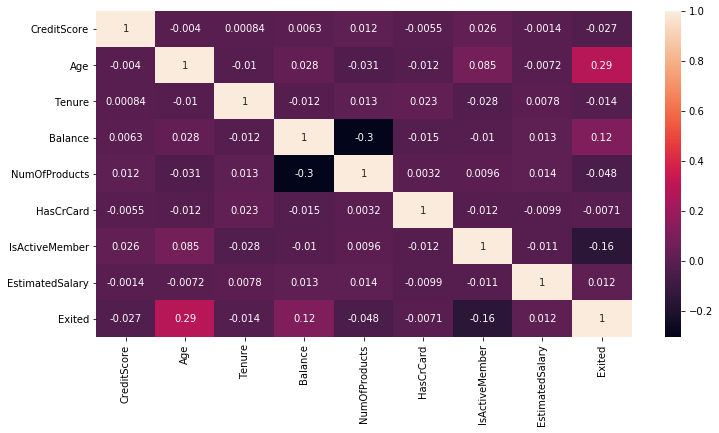

In [177]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

Note :  
* Age มี correlation กับ Exited สูงสุด (0.29)
* HasCrCard มี correlation กับ Exited ต่ำสุด (-0.0071) แทบไม่มีผลต่อการอยู่ต่อหรือไม่ของลูกค้า
* Balance กับ NumOfProducts มี negative correlation มากที่สุด

## 16. สร้าง scatterplot ของ Balance กับ EstimatedSalary (จากสมมติฐานของเราว่าคนเงินเดือนเยอะ เงินฝากน่าจะเยอะด้วย)

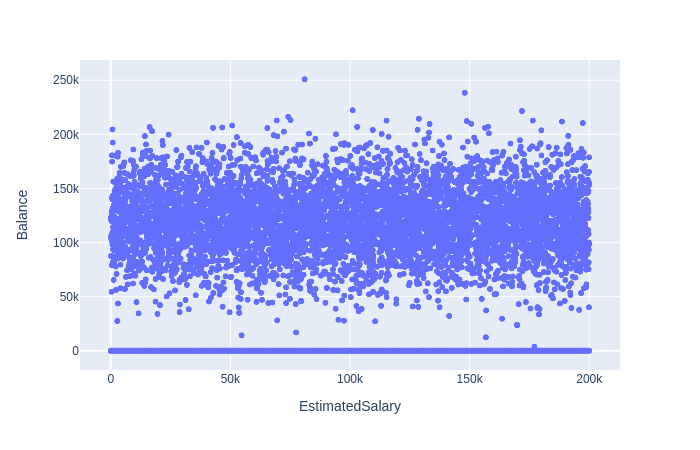

In [10]:
fig = px.scatter(df, y='Balance', x='EstimatedSalary')
fig.show()

Note :  
คนเงินเดือนเยอะหรือน้อย จำนวนเงินฝากไม่ได้แตกต่างกัน

## 17. สร้าง scatterplot ของ Balance กับ EstimatedSalary เฉพาะคู่ที่ค่าของ Balance > 0

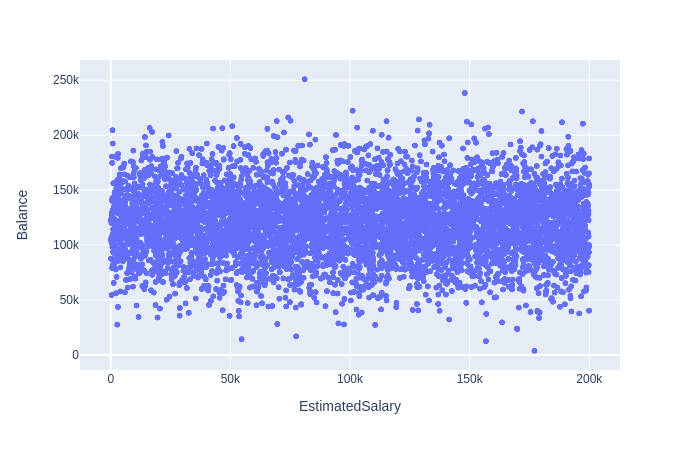

In [11]:
fig = px.scatter(df[df['Balance'] > 0], x='EstimatedSalary', y='Balance' )
fig.show()

Note :  
คนเงินเดือนเยอะหรือน้อย จำนวนเงินฝากไม่ได้แตกต่างกัน

## 18.สร้าง scatterplot ของอายุกับเงินเดือนโดยประมาณ (จากสมมติฐานของเราว่าคนอายุเยอะ ทำงานนาน เงินเดือนน่าจะสูงขึ้นด้วย)

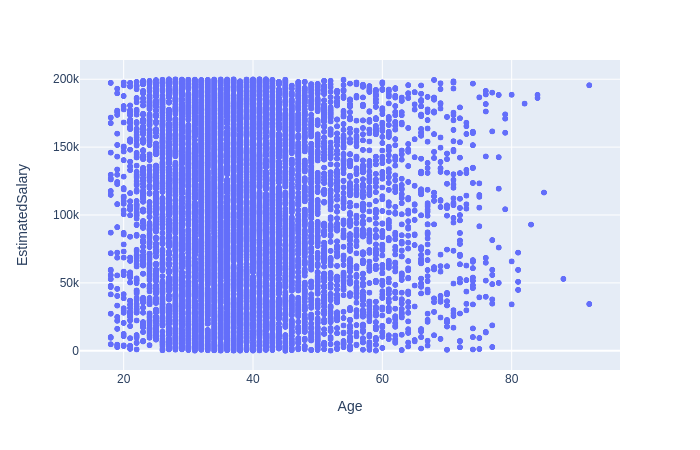

In [12]:
fig = px.scatter(df, x='Age', y='EstimatedSalary')
fig.show()

Note :  
คนอายุเยอะหรือน้อย มีเงินเดือนทั้งมากและน้อย

## 19. สร้าง countplot ของ Geography แบ่งสีด้วยเพศ

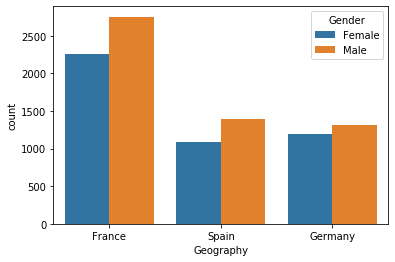

In [181]:
sns.countplot(x=df['Geography'], hue=df['Gender'])

Note :  
ทั้ง 3 ประเทศ มีจำนวนลูกค้าเพศชายมากกว่าเพศหญิง

## 20. บอกจำนวนของแต่ละเพศในภูมิภาคที่ต่างกัน

In [13]:
df.groupby(['Geography'])['Gender'].value_counts()

Geography  Gender
France     Male      2753
           Female    2261
Germany    Male      1316
           Female    1193
Spain      Male      1388
           Female    1089
Name: Gender, dtype: int64

## 21. ดู % ของลูกค้าที่ churn

In [14]:
print('ลูกค้าที่ churn = %.3f' %(len(df[df['Exited']==1])/len(df)*100), '%')

ลูกค้าที่ churn = 20.370 %


## 22. ใช้ plotly พล็อต pie chart ของผลรวมของจำนวนลูกค้าที่ churn ในแต่ละภูมิภาค

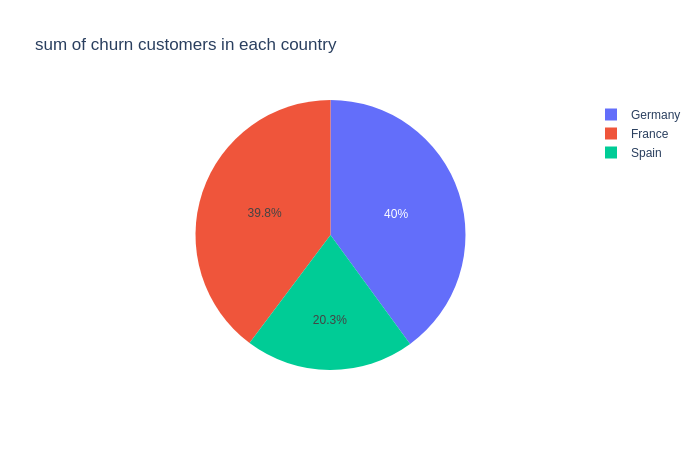

In [15]:
fig = px.pie(df, names='Geography', values='Exited', title='sum of churn customers in each country')
fig.show(0)

Note :  
จำนวนลูกค้าที่ churn ในประเทศฝรั่งเศสและเยอรมนี มีจำนวนใกล้เคียงกัน

## 23. ใช้ plotly พล็อต bar chart ของผลรวมของจำนวนลูกค้าที่ churn ในแต่ละภูมิภาค

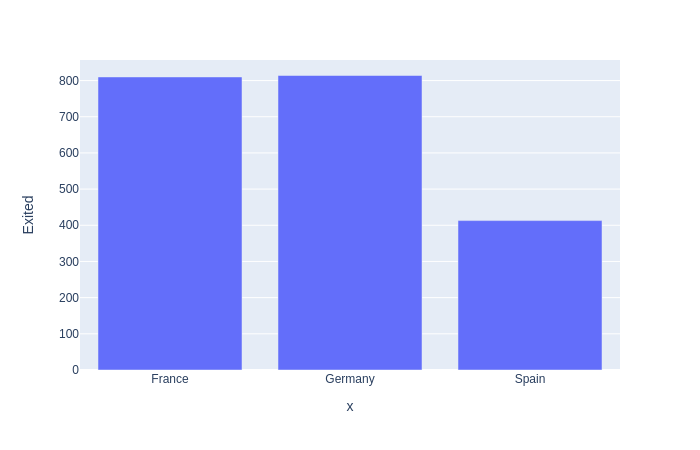

In [16]:
fig = px.bar(df.groupby(['Geography']).sum(), x=df.groupby(['Geography']).sum().index, y='Exited')
fig.show()

Note :  
จำนวนลูกค้าที่ churn ในประเทศฝรั่งเศสและเยอรมนี มีจำนวนใกล้เคียงกัน

## 24. หาจำนวน % ของลูกค้าที่ churn ในแต่ละภูมิภาค (คิดในภูมิภาคตัวเอง)

In [17]:
print('% ของลูกค้าที่ churn ในแต่ละภูมิภาค')
df.groupby('Geography').mean()['Exited']*100

% ของลูกค้าที่ churn ในแต่ละภูมิภาค


Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

## 25. ใช้ plotly พล็อต pie chart ของอัตราส่วนของ % ของจำนวนลูกค้าที่ churn ในแต่ละภูมิภาค (ไม่เหมือนข้อ 22)


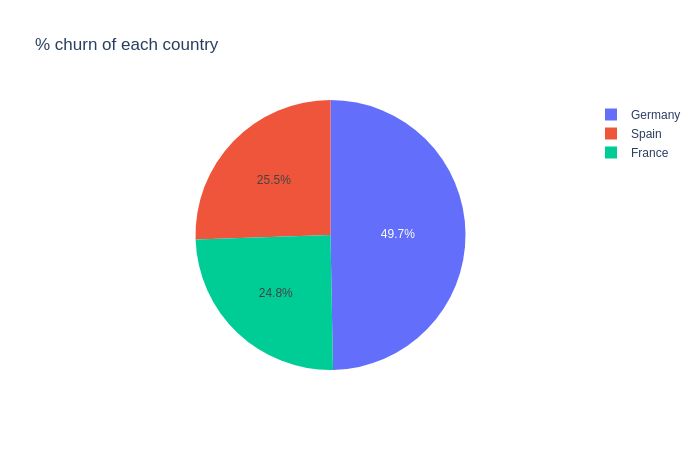

In [18]:
fig = px.pie(df.groupby('Geography').mean(), 
             names=df.groupby('Geography').mean()['Exited'].index,
             title='% churn of each country',
            values='Exited')
fig.show()

Note :  
เปอร์เซ็นต์ของลูกค้าที่ churn ในประเทศเยอรมนี มีมากกว่าทั้งฝรั่งเศสและสเปนถึง 2 เท่า

## 26. ใช้ plotly สร้าง distplot ของกลุ่มอายุลูกค้าที่ churn และระบุช่วงอายุใดมีการ churn มากที่สุด

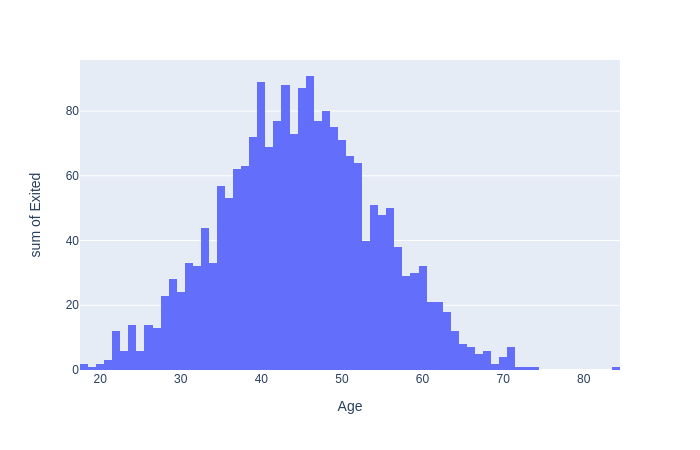

In [19]:
fig = px.histogram(df, x='Age',y='Exited')
fig.show()

Note :  
ช่วงอายุ 40-50 ปี churn มากที่สุด

## 27. ใช้ plotly สร้าง bubble plot ให้แกน X เป็นช่วงอายุ 18-27 แกน y เป็นเงินเดือนเฉลี่ยของช่วงอายุ ขนาดเป็นยอดเงินคงเหลือเฉลี่ย และสีเป็น CreditScore

In [20]:
df_Age18to27 = df[(df['Age']>=18)&(df['Age']<=27)].groupby(['Age']).mean()
df_Age18to27

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,,,,,,,,
18,686.681818,4.818182,79169.575000,1.500000,0.636364,0.590909,85102.389545,0.090909
19,665.629630,5.074074,70502.539630,1.370370,0.814815,0.555556,97734.100370,0.037037
20,665.050000,5.075000,76038.890000,1.550000,0.650000,0.475000,97705.542000,0.050000
21,647.283019,4.773585,75926.882830,1.660377,0.716981,0.603774,102536.673774,0.056604
22,636.547619,5.678571,68213.748810,1.523810,0.690476,0.547619,98321.615476,0.142857
23,657.777778,5.414141,78528.569899,1.525253,0.676768,0.454545,110148.368485,0.060606
24,653.704545,5.030303,72824.278182,1.507576,0.689394,0.522727,107179.807424,0.106061
25,642.818182,5.155844,78282.264740,1.616883,0.714286,0.545455,98793.466688,0.038961
26,648.785000,4.985000,79573.747450,1.515000,0.695000,0.505000,102439.511500,0.070000


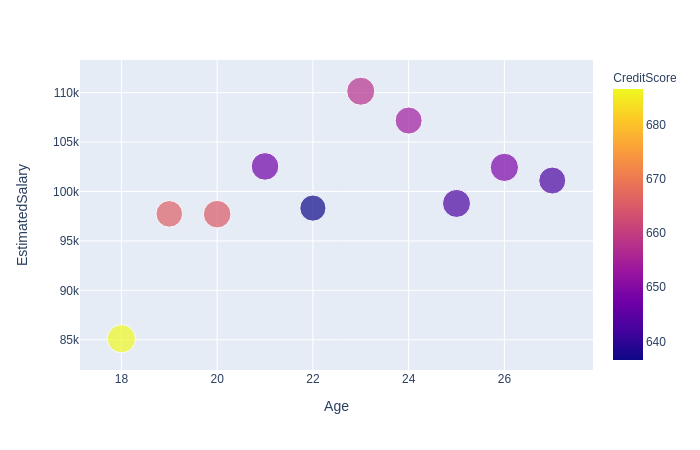

In [21]:
fig = px.scatter(df_Age18to27, x=df_Age18to27.index, y='EstimatedSalary',
                size='Balance', color='CreditScore')
fig.show()

Note :  
* ยอดเงินคงเหลือเฉลี่ยในบัญชี (ดูได้จากขนาดของ bubble) มีขนาดใกล้เคียงกันทุกช่วงอายุ
* ในช่วงอายุ 18 - 27 ปี Estimated salary มีแนวโน้มเพิ่มขึ้นเมื่ออายุมากขึ้น
* คนอายุ 18 มี credit score เฉลี่ย สูงกว่าคนอายุมากกว่า

## 28. ใช้ plotly สร้าง barplot ของ % ของลูกค้าที่ churn ในแต่ละค่าของ NumOfProduct ใส่ชื่อแกนและชื่อกราฟให้เหมาะสม (อธิบายว่า Data Insight ที่ได้จากกราฟนี้สมเหตุสมผลหรือไม่อย่างไร)


In [22]:
df_numproduct_churn = df.groupby('NumOfProducts').mean()[['Exited']]*100
df_numproduct_churn

,Exited
NumOfProducts,
1,27.714398
2,7.581699
3,82.706767
4,100.000000


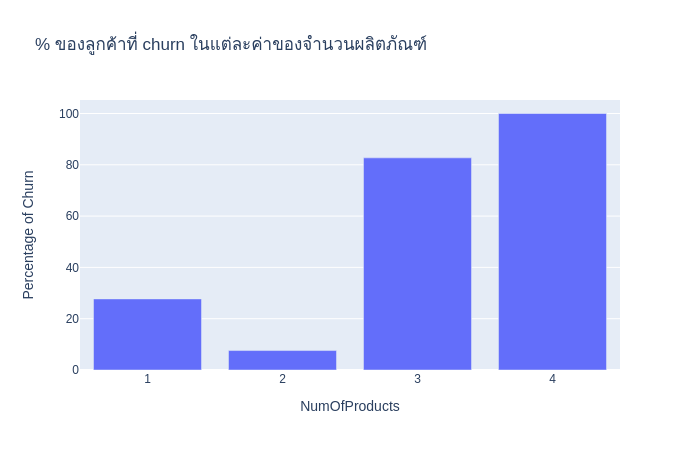

In [23]:
fig = px.bar(df_numproduct_churn, x=df_numproduct_churn.index, y='Exited', 
             labels={'Exited':'Percentage of Churn'},
            title='% ของลูกค้าที่ churn ในแต่ละค่าของจำนวนผลิตภัณฑ์')
fig.show()

Note :  
* ลูกค้าที่มีจำนวนผลิตภัณฑ์ 2 ผลิตภัณฑ์ มีโอกาส churn น้อยที่สุด
* ลูกค้าที่มี 1 ผลิตภัณฑ์ มีโอกาส churn ประมาณ 30% น่าจะเป็นลูกค้าใหม่ที่อาจมาใช้ผลิตภัณฑ์ดูแล้วและรู้สึกไม่ตอบโจทย์ความต้องการ
* ลูกค้าที่มีจำนวนผลิตภัณฑ์ถึง 4 ผลิตภัณฑ์ มีโอกาส churn 100% จริงๆน่าจะเป็นลูกค้าประจำจึงมีผลิตภัณฑ์เยอะที่สุด และไม่น่าจะมีโอกาส churn ถึง 100% นอกเสียจากว่าลูกค้ากลุ่มนี้ทุกคนไม่พอใจในผลิตภัณฑ์ หรือ ไม่สามารถบริหารจัดการได้ดีพอจึงเกิดการ churn
* ลูกค้าที่มี 3 ผลิตภัณฑ์ ก็มีโอกาส churn สูงถึง 80% 

## 29. ใช้ plotly สร้าง barplot หา % การ churn ของแต่ละเพศ

In [24]:
df_gender_churn = df.groupby('Gender').mean()[['Exited']]*100
df_gender_churn

,Exited
Gender,
Female,25.071539
Male,16.455928


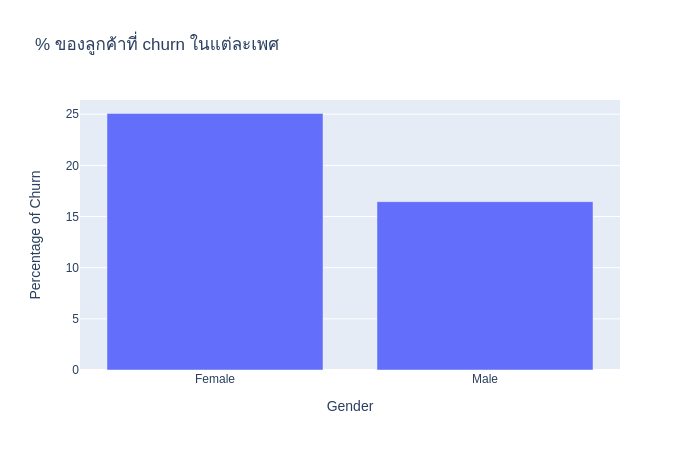

In [25]:
fig = px.bar(df_gender_churn, x=df_gender_churn.index, y='Exited', 
             labels={'Exited':'Percentage of Churn'},
            title='% ของลูกค้าที่ churn ในแต่ละเพศ')
fig.show()

Note :  
* ผู้หญิง มีโอกาส churn ถึง 25% ในขณะที่ผู้ชายมีโอกาส churn เพียง16%

## ต่อมาเป็นการจัดการกับ Outliers

## 30. ใช้ boxplot ตรวจหา outliers ของแต่ละ feature

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [26]:
num_col = ['CreditScore', 'Age','Tenure','Balance','EstimatedSalary']

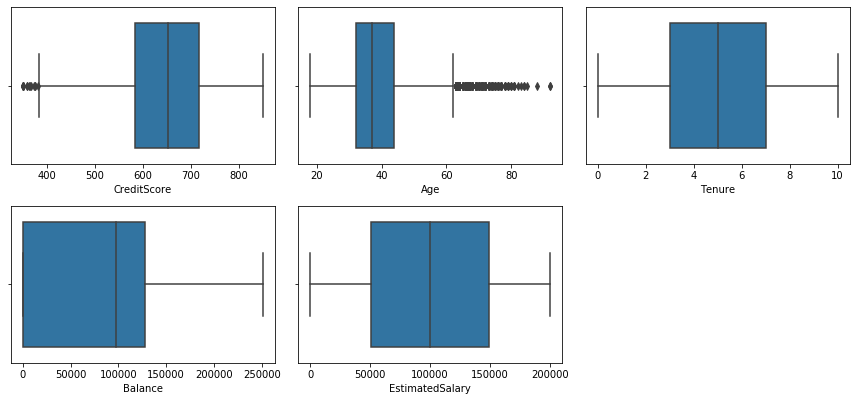

In [27]:
fig = plt.figure(figsize=(12,8))
i=1

for col in num_col:
    plt.subplot(3,3,i)
    sns.boxplot(df[col])
    i+=1
fig.tight_layout()

Note :  
* CreditScore และ Age มี outliers

## 31. Feature ที่มีค่าที่เกินขอบเขตบน (upper fence) ให้เปลี่ยนค่าเหล่านั้นให้เท่าขอบเขตบน ถ้าต่ำกว่าขอบเขตล่าง (lower fence) ให้ปรับค่าเหล่านั้นให้เท่ากับขอบเขตล่าง

Note :  
IQR = Q3 - Q1  
lower fence = Q1 - (1.5 * IQR)  
upper fence = Q3 + (1.5 * IQR)  

In [41]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [28]:
def clip_outliers(series):
    # calculate Q1, Q3, IQR, lower_fence and upper_fence
    Q1 = series.describe()[4]
    Q3 = series.describe()[6]
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    
    # clip outliers
    series = [lower_fence if x < lower_fence else upper_fence if x > upper_fence else x for x in series]
    return series

In [29]:
df['CreditScore'] = clip_outliers(df['CreditScore'])
df['Age'] = clip_outliers(df['Age'])

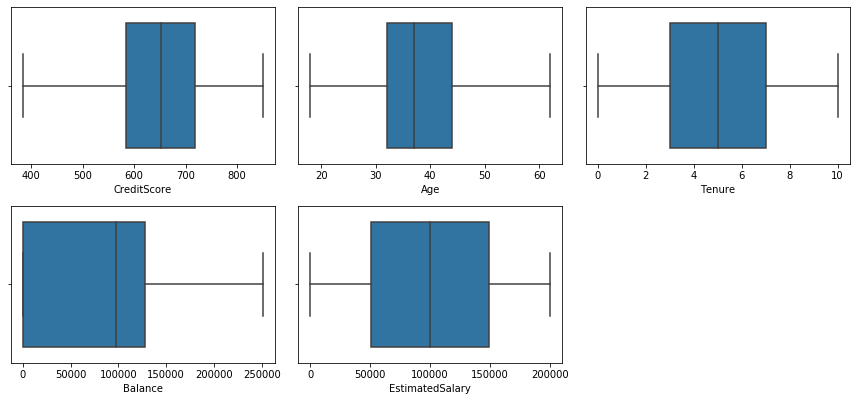

In [30]:
# plot the boxplot again
fig = plt.figure(figsize=(12,8))
i=1

for col in num_col:
    plt.subplot(3,3,i)
    sns.boxplot(df[col])
    i+=1
fig.tight_layout()

## 32. เปลี่ยนชื่อ column จาก Exited เป็น churn

In [31]:
df.rename(columns={'Exited':'churn'}, inplace=True)
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,Liu,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


## 33. ลบฟีเจอร์นามสกุล

In [32]:
df.drop(['Surname'], axis=1, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,516.0,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,709.0,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,772.0,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


## 34.สร้าง dummies ให้ Categorical columns พร้อมทั้งจัดการ Multi-collinearity

In [33]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2,0.00,1,1,1,101348.88,1,0,0,0
1,608.0,41.0,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502.0,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699.0,39.0,1,0.00,2,0,0,93826.63,0,0,0,0
4,850.0,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516.0,35.0,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709.0,36.0,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772.0,42.0,3,75075.31,2,1,0,92888.52,1,1,0,1


## 35. สร้าง train/test split ด้วย 80:20 ratio

In [34]:
# X and y
X = df_dummies.drop(['churn'], axis=1).copy()
y = df_dummies['churn'].copy()

In [35]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2,0.00,1,1,1,101348.88,0,0,0
1,608.0,41.0,1,83807.86,1,0,1,112542.58,0,1,0
2,502.0,42.0,8,159660.80,3,1,0,113931.57,0,0,0
3,699.0,39.0,1,0.00,2,0,0,93826.63,0,0,0
4,850.0,43.0,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39.0,5,0.00,2,1,0,96270.64,0,0,1
9996,516.0,35.0,10,57369.61,1,1,1,101699.77,0,0,1
9997,709.0,36.0,7,0.00,1,0,1,42085.58,0,0,0
9998,772.0,42.0,3,75075.31,2,1,0,92888.52,1,0,1


In [36]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [39]:
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (8000, 11)
X_test shape :  (2000, 11)
y_train shape :  (8000,)
y_test shape :  (2000,)


## 36. สร้างโมเดลแบบ Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# define model
clf = LogisticRegression()
# fit model
clf.fit(X_train, y_train)
# make prediction
ypred_logistic = clf.predict(X_test)

## 37. สร้าง countplot ของค่าที่ทำนายโดย Logistic Regression

Text(0.5, 1.0, 'Churn Prediction from Logistic Regression model')

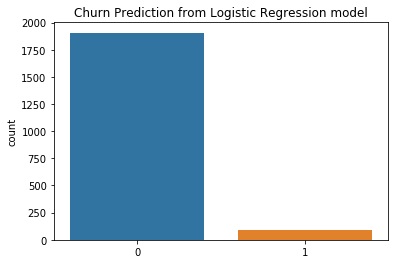

In [42]:
sns.countplot(ypred_logistic)
plt.title('Churn Prediction from Logistic Regression model')

## 38. วัดผลโมเดล Logistic Regression โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [43]:
from sklearn import metrics

In [44]:
# model evaluation 
def model_eval(y_test, y_pred) :
    cm = metrics.confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    
    print('-----evaluation metrix-----')
    print('confusion matrix : \n', cm)
    print('accuracy : ', accuracy)
    print('F1 score : ', f1)
    print('precision : ', precision)
    print('recall : ', recall)
    print('\n')
    
    return cm, accuracy, f1, precision, recall

In [45]:
cm_logistic, acc_logistic, f1_logistic, precision_logistic, recall_logistic = model_eval(y_test, ypred_logistic)

-----evaluation metrix-----
confusion matrix : 
 [[1527   46]
 [ 379   48]]
accuracy :  0.7875
F1 score :  0.1842610364683301
precision :  0.5106382978723404
recall :  0.11241217798594848




True Negative = 1527  
True Positive = 48  
False Negative = 379  
False Positive = 46  

## 39.สร้างโมเดลแบบ K-Nearest Neighbours

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# define model
clf = KNeighborsClassifier()
# fit model
clf.fit(X_train, y_train)
# make prediction
ypred_KNN = clf.predict(X_test)

## 40. สร้าง countplot ของค่าที่ทำนายโดย KNN


Text(0.5, 1.0, 'Churn Prediction from KNN model')

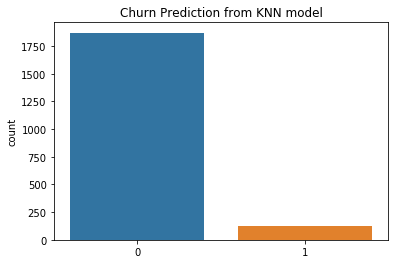

In [48]:
sns.countplot(ypred_KNN)
plt.title('Churn Prediction from KNN model')

## 41. วัดผลโมเดล KNN โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [49]:
cm_KNN, acc_KNN, f1_KNN, precision_KNN, recall_KNN = model_eval(y_test, ypred_KNN)

-----evaluation metrix-----
confusion matrix : 
 [[1476   97]
 [ 395   32]]
accuracy :  0.754
F1 score :  0.11510791366906477
precision :  0.24806201550387597
recall :  0.07494145199063232




True Negative = 1476  
True Positive = 32  
False Negative = 395  
False Positive = 97  
  
  ความแม่นยำในการทำนายน้อยกว่า Logistic Regression

## 42. สร้างโมเดลแบบ Support Vector Machine

In [50]:
from sklearn.svm import SVC

In [51]:
# define model
clf = SVC()
# fit model
clf.fit(X_train, y_train)
# make prediction
ypred_SVC = clf.predict(X_test)

## 43.สร้าง countplot ของค่าที่ทำนายโดย SVM

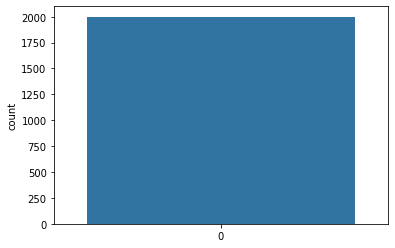

In [52]:
sns.countplot(ypred_SVC)

Note : SVM ทำนายเป็น 0 (ไม่ churn) ทั้งหมด

## 44. วัดผลโมเดล SVM โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [53]:
cm_SVC, acc_SVC, f1_SVC, precision_SVC, recall_SVC = model_eval(y_test, ypred_SVC)

-----evaluation metrix-----
confusion matrix : 
 [[1573    0]
 [ 427    0]]
accuracy :  0.7865
F1 score :  0.0
precision :  0.0
recall :  0.0




/home/samantha/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



## 45. ให้เหตุผลว่าทำไมโมเดล SVM ถึงมีค่า F1 Score, Recall, Precision เป็น 0 แต่ Accuracy ไม่ใช่

Note :  
* ความแม่นยำในการทำนายมีค่าสูง แต่ได้จากการโกงของโมเดล โดยการทำนายค่าทั้งหมดเป็น 0   
ทำให้ precision และ recall มีค่าเป็น 0 เพราะ true positive = 0  
และ f1 = 0 เนื่องมาจาก precision และ recall = 0 ทั้งสองค่า

## 46. สร้างโมเดล Naïve Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
# define model
clf = GaussianNB()
# fit model
clf.fit(X_train, y_train)
# make prediction
ypred_NB = clf.predict(X_test)

## 47. สร้าง countplot ของค่าที่ทำนายโดย Naïve Bayes

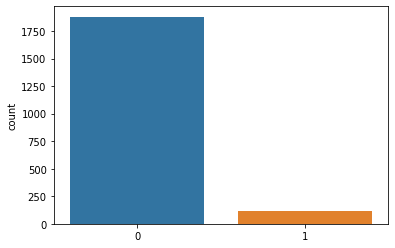

In [56]:
sns.countplot(ypred_NB)

## 48. วัดผลโมเดล Naïve Bayes โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [57]:
cm_NB, acc_NB, f1_NB, precision_NB, recall_NB = model_eval(y_test, ypred_NB)

-----evaluation metrix-----
confusion matrix : 
 [[1512   61]
 [ 368   59]]
accuracy :  0.7855
F1 score :  0.21572212065813526
precision :  0.49166666666666664
recall :  0.13817330210772832




Note :  
ประสิทธิภาพโมเดลใกล้เคียงกับ Logistic regression และไม่โกงเหมือน SVM

## 49.  สร้างโมเดลแบบ Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# define model
clf = DecisionTreeClassifier(criterion='entropy', random_state=100)
# fit model
clf.fit(X_train, y_train)
# make prediction
ypred_tree = clf.predict(X_test)

## 50. สร้าง countplot ของค่าที่ทำนายโดย Decision Tree

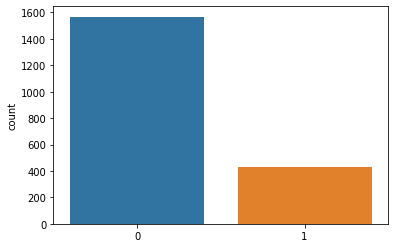

In [60]:
sns.countplot(ypred_tree)

Note :  
ผลการทำนาย ทำนายเป็น churn มากขึ้นกว่า Logistic Regression และ Naive Bayes

## 51. วัดผลโมเดล Decision Tree โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [61]:
cm_tree, acc_tree, f1_tree, precision_tree, recall_tree = model_eval(y_test, ypred_tree)

-----evaluation metrix-----
confusion matrix : 
 [[1353  220]
 [ 215  212]]
accuracy :  0.7825
F1 score :  0.4935972060535506
precision :  0.49074074074074076
recall :  0.4964871194379391




Note :  
* accuracy น้อยกว่า Logistic regression เล็กน้อย 
* f1, precision, recall มากกว่า Logistic regression

## 52. สร้างโมเดลแบบ Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
# define model
clf = RandomForestClassifier(criterion='entropy', random_state=100)
# fit model
clf.fit(X_train, y_train)
# make prediction
ypred_forest = clf.predict(X_test)

## 53. สร้าง countplot ของค่าที่ทำนายโดย Random Forest

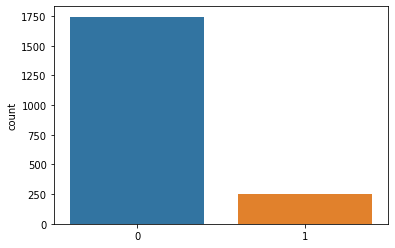

In [64]:
sns.countplot(ypred_forest)

## 54. วัดผลโมเดล Random Forest โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

In [65]:
cm_forest, acc_forest, f1_forest, precision_forest, recall_forest = model_eval(y_test, ypred_forest)

-----evaluation metrix-----
confusion matrix : 
 [[1515   58]
 [ 230  197]]
accuracy :  0.856
F1 score :  0.5777126099706745
precision :  0.7725490196078432
recall :  0.4613583138173302




Note :  
* Accuracy และ Precision ดีขึ้นกว่า Decision tree มาก
* F1 ดีขึ้นเล็กน้อย
* recall ลดลงเล็กน้อย

## 55. ใช้ plotly ทำ barplot เปรียบเทียบค่า Accuracy, F1 score, Recall, Precision ของแต่ละโมเดล


In [66]:
# create evaluation dataframe
dict_eval = {'Accuracy':[acc_logistic, acc_KNN, acc_SVC, acc_NB, acc_tree, acc_forest],
            'F1':[f1_logistic, f1_KNN, f1_SVC, f1_NB, f1_tree, f1_forest],
            'Precision':[precision_logistic,precision_KNN,precision_SVC,precision_NB,precision_tree,precision_forest],
            'Recall':[recall_logistic,recall_KNN,recall_SVC,recall_NB,recall_tree,recall_forest]}
df_eval = pd.DataFrame(dict_eval, index=['LogisticRegression','KNN','SVC','NaiveBayes','DecisionTree','RandomForest'])
df_eval

,Accuracy,F1,Precision,Recall
LogisticRegression,0.7875,0.184261,0.510638,0.112412
KNN,0.7540,0.115108,0.248062,0.074941
SVC,0.7865,0.000000,0.000000,0.000000
NaiveBayes,0.7855,0.215722,0.491667,0.138173
DecisionTree,0.7825,0.493597,0.490741,0.496487
RandomForest,0.8560,0.577713,0.772549,0.461358


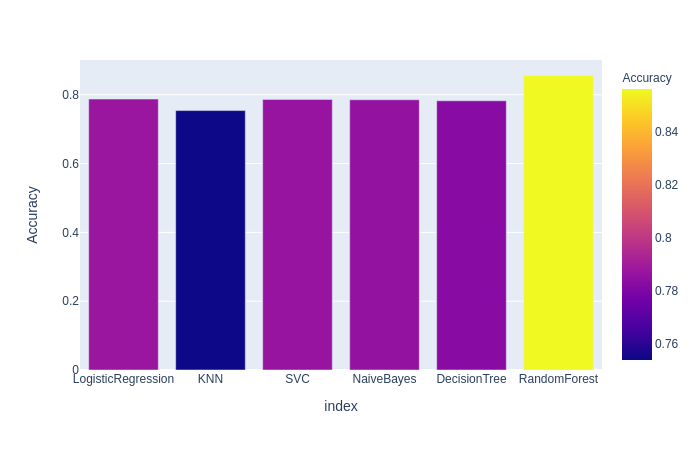

In [67]:
fig = px.bar(df_eval, x=df_eval.index, y='Accuracy', color='Accuracy')
fig.show()

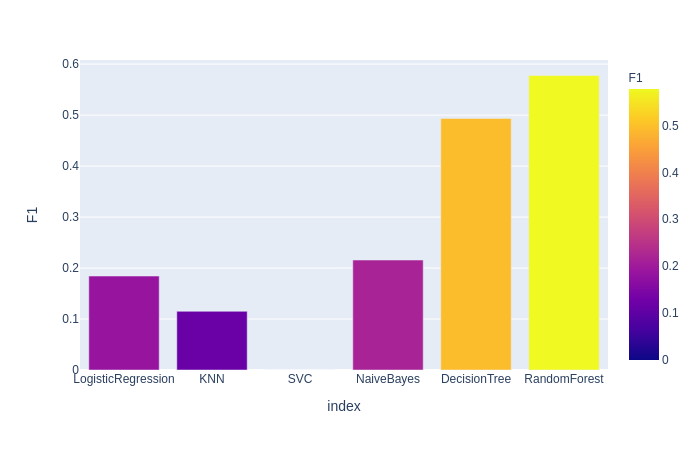

In [68]:
fig = px.bar(df_eval, x=df_eval.index, y='F1', color='F1')
fig.show()

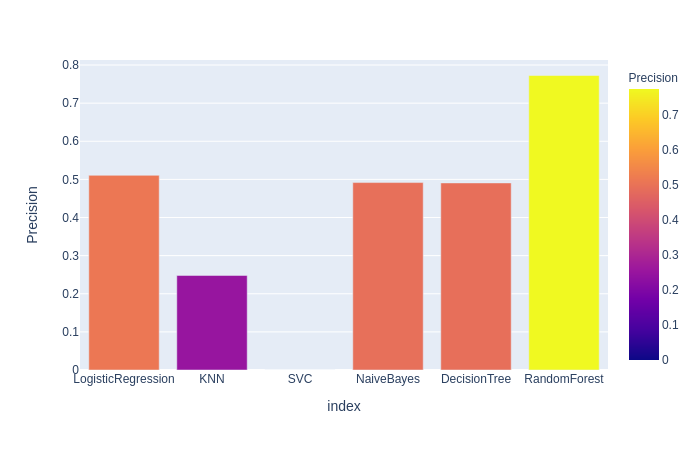

In [69]:
fig = px.bar(df_eval, x=df_eval.index, y='Precision', color='Precision')
fig.show()

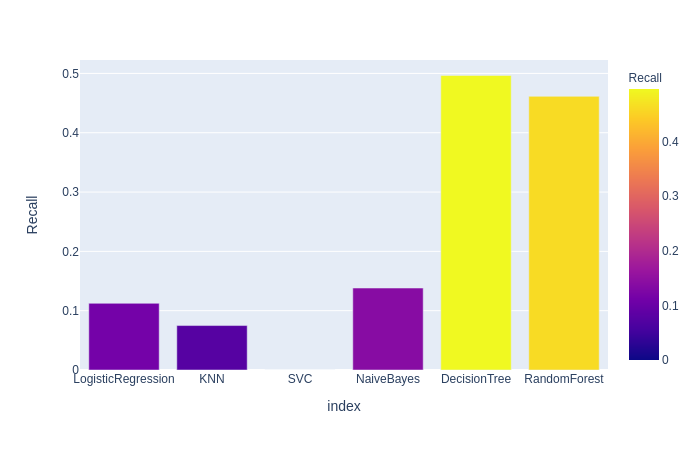

In [70]:
fig = px.bar(df_eval, x=df_eval.index, y='Recall', color='Recall')
fig.show()

## 56. ทำ Normalization ให้ Dataset สำหรับ SVM โมเดล และเทรนโมเดล SVM ใหม่

In [85]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5541,587.0,51.0,3,83739.32,1,0,1,148798.45,0,1,1
5408,682.0,54.0,0,83102.72,2,1,1,54132.93,0,1,0
2364,707.0,31.0,2,82787.93,2,0,0,91423.69,0,0,0
1257,628.0,38.0,3,0.00,2,1,1,48924.73,0,0,0
6342,581.0,37.0,10,104255.03,1,1,0,86609.37,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7769,766.0,27.0,7,158786.67,2,0,1,47579.25,0,0,0
8377,802.0,40.0,4,0.00,2,1,1,81908.09,0,1,1
9036,768.0,36.0,3,141334.95,1,0,1,125870.50,0,0,0
784,747.0,58.0,7,116313.57,1,1,1,190696.35,1,0,1


In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
sc_X = MinMaxScaler()
# fit transform X_train
X_train_sc = sc_X.fit_transform(X_train)
# transform X_test
X_test_sc = sc_X.transform(X_test)

In [73]:
X_train_sc

array([[0.43683084, 0.75      , 0.3       , ..., 0.        , 1.        ,
        1.        ],
       [0.64025696, 0.81818182, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.69379015, 0.29545455, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.82441113, 0.40909091, 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [0.77944325, 0.90909091, 0.7       , ..., 1.        , 0.        ,
        1.        ],
       [0.53533191, 0.31818182, 0.5       , ..., 0.        , 1.        ,
        1.        ]])

In [74]:
X_test_sc

array([[0.16702355, 0.15909091, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.50535332, 0.38636364, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.67665953, 0.5       , 0.8       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5503212 , 0.65909091, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.81584582, 0.13636364, 0.7       , ..., 0.        , 0.        ,
        0.        ],
       [0.47751606, 0.54545455, 1.        , ..., 0.        , 1.        ,
        1.        ]])

In [75]:
# เทรน SVM ใหม่

# define model
clf = SVC()
# fit model
clf.fit(X_train_sc, y_train)
# make prediction
ypred_SVC_norm = clf.predict(X_test_sc)

## 57. สร้าง countplot ของค่าที่ทำนายโดย SVM

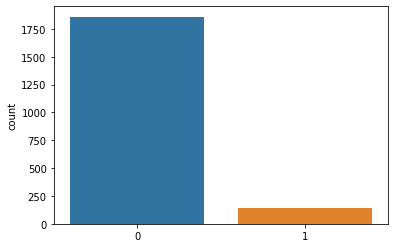

In [76]:
sns.countplot(ypred_SVC_norm)

Note :  
โมเดลไม่โกงด้วยการทำนายค่า 0 ทั้งหมดแล้ว

## 58. วัดผลโมเดล SVM โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision แล้วพิจาณาว่าผลลัพธ์ดีขึ้นไหม

In [77]:
cm_SVC_norm, acc_SVC_norm, f1_SVC_norm, precision_SVC_norm, recall_SVC_norm = model_eval(y_test, ypred_SVC_norm)

-----evaluation metrix-----
confusion matrix : 
 [[1549   24]
 [ 310  117]]
accuracy :  0.833
F1 score :  0.4119718309859155
precision :  0.8297872340425532
recall :  0.27400468384074944




Note :  
* Accuracy ดีเกือบเท่า Random Forest 
* Precision ดีกว่า Random Forest
* F1 แล Recall น้อยกว่า

## 59.ใช้ GridSearch ทำ Hyperparameter tuning ให้ SVM โดยใช้ข้อมูลที่ Normalized แล้ว


In [78]:
from sklearn.model_selection import GridSearchCV

In [80]:
X_train_sc

array([[0.43683084, 0.75      , 0.3       , ..., 0.        , 1.        ,
        1.        ],
       [0.64025696, 0.81818182, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.69379015, 0.29545455, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.82441113, 0.40909091, 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [0.77944325, 0.90909091, 0.7       , ..., 1.        , 0.        ,
        1.        ],
       [0.53533191, 0.31818182, 0.5       , ..., 0.        , 1.        ,
        1.        ]])

In [81]:
grid_params = {'C':[5,10,20,50,100],
              'gamma':[0.5,1,2,5,10]}

# grid_search
grid_search = GridSearchCV(SVC(), grid_params, verbose=3)
grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=5, gamma=0.5 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=5, gamma=0.5, score=0.864, total=   1.2s
[CV] C=5, gamma=0.5 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ...................... C=5, gamma=0.5, score=0.858, total=   1.3s
[CV] C=5, gamma=0.5 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ...................... C=5, gamma=0.5, score=0.846, total=   1.4s
[CV] C=5, gamma=0.5 ..................................................
[CV] ...................... C=5, gamma=0.5, score=0.856, total=   1.2s
[CV] C=5, gamma=0.5 ..................................................
[CV] ...................... C=5, gamma=0.5, score=0.851, total=   1.2s
[CV] C=5, gamma=1 ....................................................
[CV] ........................ C=5, gamma=1, score=0.862, total=   1.2s
[CV] C=5, gamma=1 ....................................................
[CV] ........................ C=5, gamma=1, score=0.861, total=   1.2s
[CV] C=5, gamma=1 ....................................................
[CV] ........................ C=5, gamma=1, score=0.843, total=   1.2s
[CV] C=5, gamma=1 ....................................................
[CV] ........................ C=5, gamma=1, score=0.854, total=   1.2s
[CV] C=5, gamma=1 ....................................................
[CV] .

[CV] ....................... C=20, gamma=2, score=0.841, total=   2.2s
[CV] C=20, gamma=2 ...................................................
[CV] ....................... C=20, gamma=2, score=0.839, total=   1.7s
[CV] C=20, gamma=2 ...................................................
[CV] ....................... C=20, gamma=2, score=0.828, total=   1.7s
[CV] C=20, gamma=2 ...................................................
[CV] ....................... C=20, gamma=2, score=0.822, total=   1.5s
[CV] C=20, gamma=2 ...................................................
[CV] ....................... C=20, gamma=2, score=0.818, total=   1.9s
[CV] C=20, gamma=5 ...................................................
[CV] ....................... C=20, gamma=5, score=0.799, total=   1.8s
[CV] C=20, gamma=5 ...................................................
[CV] ....................... C=20, gamma=5, score=0.812, total=   1.7s
[CV] C=20, gamma=5 ...................................................
[CV] .

[CV] ...................... C=100, gamma=5, score=0.769, total=   2.0s
[CV] C=100, gamma=5 ..................................................
[CV] ...................... C=100, gamma=5, score=0.766, total=   2.1s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.785, total=   2.7s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.797, total=   2.3s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.787, total=   2.3s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.784, total=   2.3s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.774, total=   2.4s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [5, 10, 20, 50, 100],
                         'gamma': [0.5, 1, 2, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

## 60.สร้าง countplot ของค่าที่ทำนายโดย SVM ที่ทำ Hyperparameter tuning + Normalization แล้ว


In [82]:
# grid search best parameters
grid_search.best_params_

{'C': 20, 'gamma': 0.5}

In [83]:
# grid search prediction
ypred_SVC_norm_grid = grid_search.predict(X_test_sc)

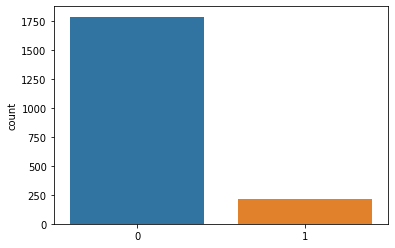

In [84]:
sns.countplot(ypred_SVC_norm_grid)

## 61. วัดผลโมเดล SVM โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision แล้วพิจาณาว่าผลลัพธ์ดีขึ้นไหม


In [85]:
# grid search SVC model on normalized data
cm_SVC_grid, acc_SVC_grid, f1_SVC_grid, precision_SVC_grid, recall_SVC_grid = model_eval(y_test, ypred_SVC_norm_grid)

-----evaluation metrix-----
confusion matrix : 
 [[1521   52]
 [ 266  161]]
accuracy :  0.841
F1 score :  0.5031249999999999
precision :  0.755868544600939
recall :  0.3770491803278688




In [86]:
# SVC model on normalized data
_,_,_,_,_ = model_eval(y_test,ypred_SVC_norm)

-----evaluation metrix-----
confusion matrix : 
 [[1549   24]
 [ 310  117]]
accuracy :  0.833
F1 score :  0.4119718309859155
precision :  0.8297872340425532
recall :  0.27400468384074944




Note :  
เมื่อเปรียบเทียบ SVM กับ grid search SVM ที่ learning normalized data พบว่า
* Accuracy, F1 score และ Recall เพิ่มขึ้น
* Precision ลดลง

## 62. ใช้ GridSearch ทำ Hyperparameter tuning ให้ Random Forest


In [87]:
# Random Forest กับ Default Value
param_combination = {'max_depth':[4,8,16,32,None], 'min_samples_leaf':[1,2,4,8,12,16,20], 'n_estimators' : [10,20,50,100,300]}
grid_search = GridSearchCV(RandomForestClassifier(criterion='entropy', random_state=100,), param_combination, verbose=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,

In [88]:
grid_search.best_params_

{'max_depth': 16, 'min_samples_leaf': 8, 'n_estimators': 100}

In [89]:
# make prediction
ypred_forest_grid = grid_search.predict(X_test)

## 63. สร้าง countplot ของค่าที่ทำนายโดย RF ที่ทำ Hyperparameter tuning 


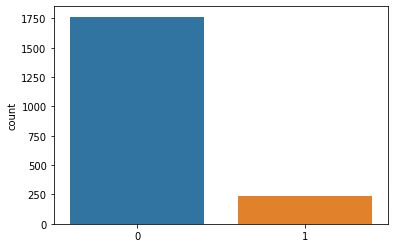

In [90]:
sns.countplot(ypred_forest_grid)

## 64. วัดผลโมเดล RF โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision แล้วพิจาณาว่าผลลัพธ์ดีขึ้นไหม


In [91]:
# Random Forest with Grid Search
cm_forest_grid, acc_forest_grid, f1_forest_grid, precision_forest_grid, recall_forest_grid = model_eval(y_test, ypred_forest_grid)

-----evaluation metrix-----
confusion matrix : 
 [[1518   55]
 [ 247  180]]
accuracy :  0.849
F1 score :  0.5438066465256798
precision :  0.7659574468085106
recall :  0.4215456674473068




In [92]:
# Random Forest model
_,_,_,_,_ = model_eval(y_test,ypred_forest)

-----evaluation metrix-----
confusion matrix : 
 [[1515   58]
 [ 230  197]]
accuracy :  0.856
F1 score :  0.5777126099706745
precision :  0.7725490196078432
recall :  0.4613583138173302




Note :  
evaluation matrix ทุกค่าน้อยกว่า Random Forest เดิม เล็กน้อย

## 65. สร้าง barplot วัดค่า Accuracy ของทุกโมเดลที่ทำมา


In [93]:
# append new results to the df_eval
df_eval.loc['SVC with Normalization'] = [acc_SVC_norm, f1_SVC_norm, precision_SVC_norm, recall_SVC_norm]
df_eval.loc['SVC with Normalization and Grid Search'] = [acc_SVC_grid, f1_SVC_grid, precision_SVC_grid, recall_SVC_grid]
df_eval.loc['Random Forest with Grid Search'] = [acc_forest_grid, f1_forest_grid, precision_forest_grid, recall_forest_grid]
df_eval

,Accuracy,F1,Precision,Recall
LogisticRegression,0.7875,0.184261,0.510638,0.112412
KNN,0.7540,0.115108,0.248062,0.074941
SVC,0.7865,0.000000,0.000000,0.000000
NaiveBayes,0.7855,0.215722,0.491667,0.138173
DecisionTree,0.7825,0.493597,0.490741,0.496487
RandomForest,0.8560,0.577713,0.772549,0.461358
SVC with Normalization,0.8330,0.411972,0.829787,0.274005
SVC with Normalization and Grid Search,0.8410,0.503125,0.755869,0.377049
Random Forest with Grid Search,0.8490,0.543807,0.765957,0.421546


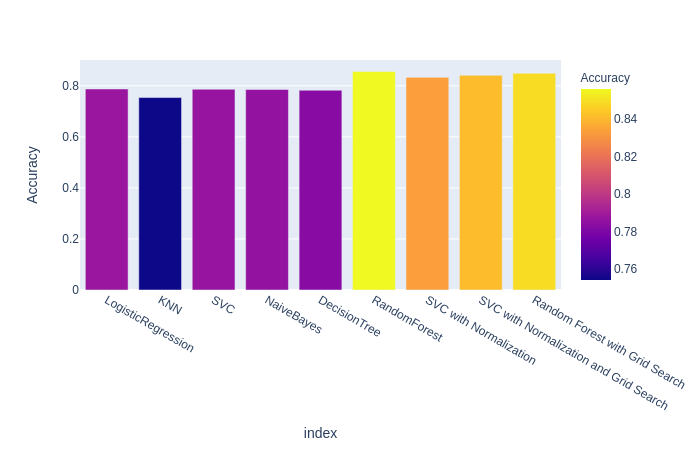

In [94]:
fig = px.bar(df_eval, x=df_eval.index, y='Accuracy', color='Accuracy')
fig.show()

Note :  
Accuracy score ของ Random Forest มากที่สุด  
รองลงมาคือ Random Forest with Grid Search ซึ่งมีค่าพารามิเตอร์ดังนี้ 

In [98]:
grid_search.best_params_

{'max_depth': 16, 'min_samples_leaf': 8, 'n_estimators': 100}

## 66. สร้าง barplot วัดค่า F1Score ของทุกโมเดลที่ทำมา


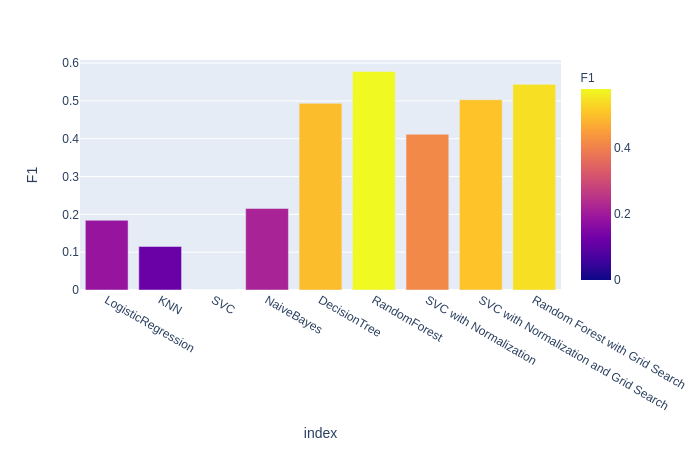

In [95]:
fig = px.bar(df_eval, x=df_eval.index, y='F1', color='F1')
fig.show()

Note :  
F1 score ของ Random Forest มากที่สุด  
รองลงมาคือ Random Forest with Grid Search

## 67. สร้าง barplot วัดค่า Precision ของทุกโมเดลที่ทำมา


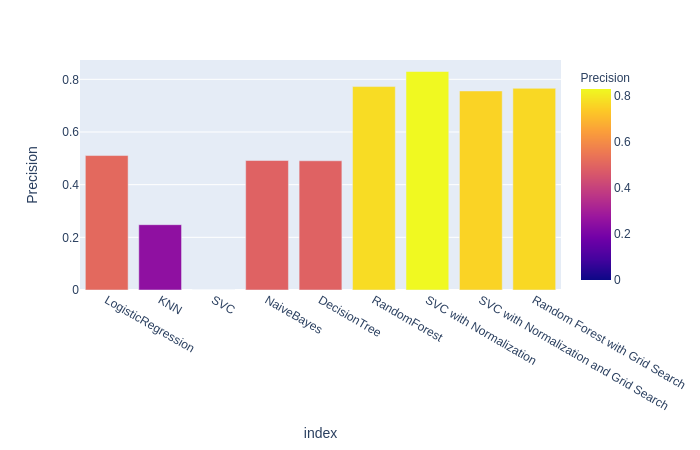

In [96]:
fig = px.bar(df_eval, x=df_eval.index, y='Precision', color='Precision')
fig.show()

Note :  
Precision score ของ SVC with Normalization มากที่สุด  
รองลงมาคือ  Random Forest

## 68. สร้าง barplot วัดค่า Recall ของทุกโมเดลที่ทำมา


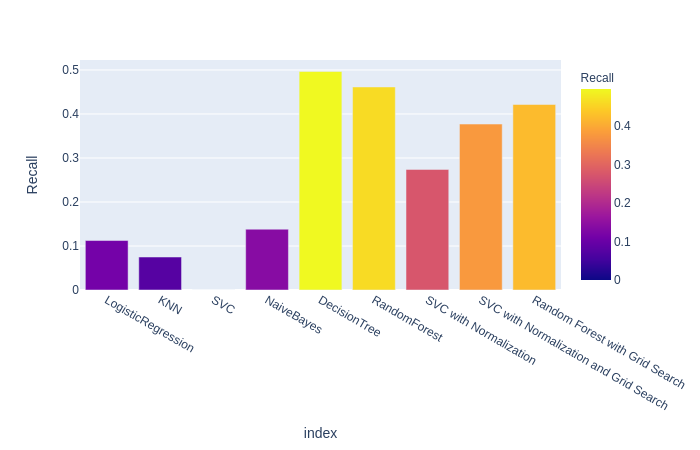

In [97]:
fig = px.bar(df_eval, x=df_eval.index, y='Recall', color='Recall')
fig.show()

Note :  
Recall score ของ Decision Tree มากที่สุด  
รองลงมาคือ Random Forest